In [1]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [2]:
users = pd.read_csv('user.csv')
ads = pd.read_csv('ad.csv')
log = pd.read_csv('click_log.csv')

In [4]:
ads.replace('\\N', 0, inplace=True)
# ads.fillna(0, inplace=True)
ads.product_id = ads.product_id.astype(np.int64)
ads.industry = ads.industry.astype(np.int64)

In [5]:
merged_log = pd.merge(log, users, on='user_id')
merged_log = pd.merge(merged_log, ads, on='creative_id')

In [6]:
merged_log

,time,user_id,creative_id,click_times,age,gender,ad_id,product_id,product_category,advertiser_id,industry
0,9,30920,567330,1,2,1,504423,30673,3,32638,319
1,15,320815,567330,1,3,1,504423,30673,3,32638,319
2,11,355089,567330,1,1,1,504423,30673,3,32638,319
3,9,363442,567330,1,2,1,504423,30673,3,32638,319
4,14,370513,567330,1,4,1,504423,30673,3,32638,319
...,...,...,...,...,...,...,...,...,...,...,...
30082766,83,309198,4049817,1,2,1,3476184,2819,2,2466,253
30082767,52,309198,2459911,1,2,1,2119242,161,2,676,231
30082768,5,309198,452252,1,2,1,402185,2870,2,7158,247
30082769,76,309198,3686554,2,2,1,3172440,3979,2,52506,247


# Stat

***
### user.csv: 900000 rows
* user_id - num:900000; range:1-900000 main_key
* *age* - 1-10
* *gender* - 1,2
***
### ads.csv: 2481135 rows
* creative_id - num:2481135 main_key
* ad_id - num:2264190 duplicate
* product_id - num:33273 range: 1-44313 exist_null: '\\N'(92952) 
* **product_category** - range:1-18
* advertiser_id - num:52090 duplicate
* **industry** - num:326 range: 1-335 exist_null: '\\N'(101048)
***
### click_log.csv: 30082771 rows
* **time** - range:1-91
* user_id - num:900000; range:1-900000 foreign_key -> users
* creative_id - num:2481135; range:1-4445718 foreign_key -> ads
* **click_times** - range:1-152

# For Long Tail Features

* **log => click_times**: <br>
    top1 - 1(0.945), <br>
    top2 - 2(0.05), <br>
    top3 - 3/4(0.004), <br>
    top4 - 5/6/7/8(0.0004), <br>
    top5 - 9-15, <br>
    top6 - 16-20, <br>
    top7 - 21-30, <br>
    top8 - 31-40, <br>
    top9 - 41-60, <br>
    top10 - >60<br>
* **user => age**: <br>
    top1 - 2/3/4(0.56), <br>
    top2 - 1(0.04), <br>
    top3 - 5/6/7(0.33), <br>
    top4 - 8/9/10(0.12)<br>
* **ads => product_category**: <br>
    top1 - 2(0.37), <br>
    top2 - 18(0.27), <br>
    top3 - 3/5/8(0.30), <br>
    top4 - 13/17/4/12/6(0.05), <br>
    top5 - 7/16/9/11(0.008), <br>
    top6 - 1/15, <br>
    top7 - 10/14<br>
* **ads => industry**: <br>
    top1 - 247/319/6/322/0(>100000, 0.35), <br>
    top2 - 242, 238, 326,  54,  73, 248, 317, 329,  25,  36,  47,  27,  21, 259, 133,  60, 297,  40, 253, 246,  13,  24, 252,  26, 289,  74, 296,  28, 207, 215,  34, 328, 216, 302, 200, 202,  88, 300, 217, 277, 176,  84,   5, 203,  86, 147(10000<x<100000, [5:51], 0.52)<br>
    top3 - (1000<x<10000, [52:131], 0.11)<br>
    top4 - (100<x<1000, [131:201], 0.013)<br>
    top5 - (x<100, [201:], 0.001)<br>

# For Feature Combination

* ad: ad_id => creative_id
* ad: industry => advertiser_id
* ad: product_category => product_id

* user => age + gender

In [100]:
users['new'] = users.age + 100 * users.gender

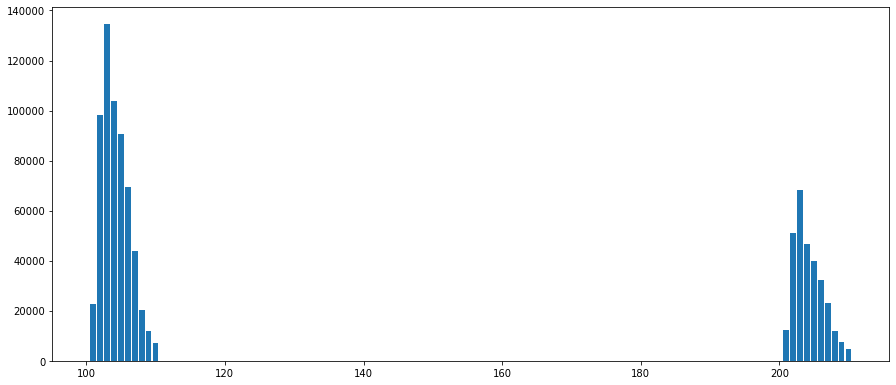

In [104]:
new_feat = users.groupby(['new']).count()['age'].index
nums = users.groupby(['new']).count()['age']
plt.figure(figsize=(15, 6.5))
plt.bar(new_feat, nums)
plt.show()

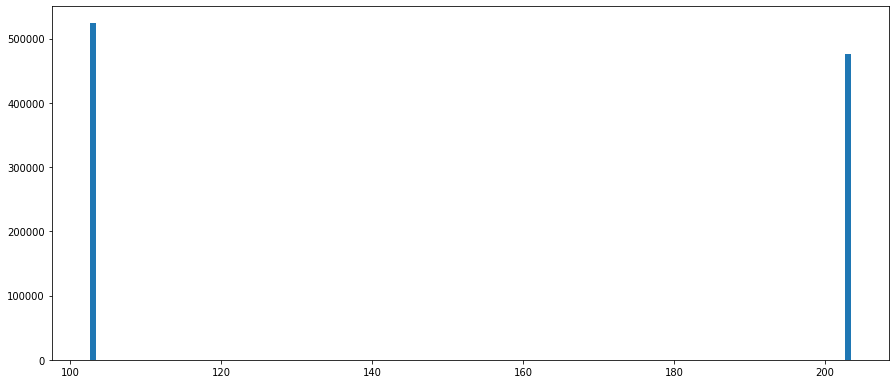

In [10]:
preds = pd.read_csv('batch128_gender.csv')
preds['new'] = preds.predicted_age + 100 * preds.predicted_gender
new_feat = preds.groupby(['new']).count()['predicted_age'].index
nums = preds.groupby(['new']).count()['predicted_age']
plt.figure(figsize=(15, 6.5))
plt.bar(new_feat, nums)
plt.show()

# For Stat Features (main key: user_id)

### importance: product_category > industry > product_id >  advertiser_id > ad_id > creative_id

### count
* ad_id_count
* ad_id_

* product_category_all
* product_category_count_top1
* product_category_count_top3

### overall count - key-value memory
* **overall count + product_category**
* overall count + industry
* overall count + product_id
* overall count + advertiser_id
* overall count + ad_id
* overall count + creative_id

### time range!!!
* **range + product_category**
* range + industry
* range + product_id
* range + advertiser_id
* range + ad_id
* range + creative_id

### click rate (user_single_ad_click/user_click_count) - key-value memory
* **rate + product_category**
* rate + industry
* rate + product_id
* rate + advertiser_id
* rate + ad_id
* rate + creative_id

### click count - key-value memory
* **count + product_category**
* count + industry
* count + product_id
* count + advertiser_id
* count + ad_id
* count + creative_id

### second order key-value memory

# For Embedding

### word2vec
* **product_category_embedding**
* **industry_embedding**
* **advertiser_id_embedding**
* **product_id_embedding**
* ad_id_embedding
* creative_id_embedding
<br><br>
* ad_id_creative_id_embedding
* **industry_advertiser_id_embedding**
* **product_category_product_id_embedding**

### NOTE: add embedding layer for primary-foreign pair specifically

### general word2vec (to be extended - time range) 
* **product_category_embedding_count_top3**
* **product_category_embedding_count_top6**
<br><br>
* **industry_embedding_count_top3**
* **industry_embedding_count_top6**
* **industry_embedding_count_top10**
<br><br>
* **advertiser_id_embedding_count_top2**
* **advertiser_id_embedding_count_top5**
* **advertiser_id_embedding_count_top10**
<br><br>
(contain null)
* **product_id_embedding_count_top5**
* **product_id_embedding_count_top9**
* **product_id_embedding_count_top15**
<br><br>
* ad_id_embedding_count_top2
* ad_id_embedding_count_top8
<br><br>
* creative_id_embedding_count_top6
* creative_id_embedding_count_top10

### field-aware embedding
* ad_id_creative_id_field_embedding
* **industry_advertiser_id_field_embedding**
* **product_category_product_id_field_embedding**

### graph embedding (DeepWalk)
* product_category_user_deepwalk_embedding
* **industry_user_deepwalk_embedding**
* **advertiser_id_user_deepwalk_embedding**
* **product_id_user_deepwalk_embedding**
* ad_id_user_deepwalk_embedding
* creative_id_user_deepwalk_embedding

### graph encoding (GCN)
* product_category_user_gcn_embedding
* **industry_user_gcn_embedding**
* **advertiser_id_user_gcn_embedding**
* **product_id_user_gcn_embedding**
* ad_id_user_gcn_embedding
* creative_id_user_gcn_embedding

# Embedding x Time

### oriented graph embedding (DeepWalk)
* product_category_user_time_deepwalk_embedding
* **industry_user_time_deepwalk_embedding**
* **advertiser_id_user_time_deepwalk_embedding**
* **product_id_user_time_deepwalk_embedding**
* ad_id_user_time_deepwalk_embedding
* creative_id_user_time_deepwalk_embedding